In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.graph_objs as go
%matplotlib inline

pd.pandas.set_option('display.max_columns',None)
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('new_dataset.csv')
dataset.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,HasChild,Children,Age,TotalAmtSpent,Relation
0,Grad,Single,58138.0,58,635,88,546,172,88,88,no child,0,64,1617,110.100000
1,Grad,Single,46344.0,38,11,1,6,2,1,6,child,2,67,27,91.766667
2,Grad,Married,71613.0,26,426,49,127,111,21,42,no child,0,56,776,98.400000
3,Grad,Married,26646.0,26,11,4,20,10,3,5,child,1,37,53,92.633333
4,PGrad,Married,58293.0,94,173,43,118,46,27,15,child,1,40,422,93.366667


In [13]:
data= dataset[['Income','TotalAmtSpent','Relation']]
data.head()

,Income,TotalAmtSpent,Relation
0,58138.0,1617,110.100000
1,46344.0,27,91.766667
2,71613.0,776,98.400000
3,26646.0,53,92.633333
4,58293.0,422,93.366667


In [15]:
data.astype('int64')

,Income,TotalAmtSpent,Relation
0,58138,1617,110
1,46344,27,91
2,71613,776,98
3,26646,53,92
4,58293,422,93
...,...,...,...
2192,61223,1341,100
2193,64014,444,88
2194,56981,1241,93
2195,69245,843,93


In [21]:
data2 = dataset[['Income','Relation','TotalAmtSpent']]

In [23]:
data2.astype('int64')

,Income,Relation,TotalAmtSpent
0,58138,110,1617
1,46344,91,27
2,71613,98,776
3,26646,92,53
4,58293,93,422
...,...,...,...
2192,61223,100,1341
2193,64014,88,444
2194,56981,93,1241
2195,69245,93,843


In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [17]:
scaled_data= sc.fit_transform(data)

In [18]:
scaled_data

array([[ 0.30877174,  1.67551506,  1.52736438],
       [-0.26501714, -0.96658012, -1.19200645],
       [ 0.96434281,  0.2780295 , -0.20808864],
       ...,
       [ 0.25248263,  1.05071771, -0.9843454 ],
       [ 0.84913744,  0.38936307, -0.97940109],
       [ 0.05243007, -0.72563433,  1.32464765]])

In [19]:
from sklearn.preprocessing import normalize
norm_data = normalize(scaled_data,norm='l2')

In [20]:
norm_data

array([[ 0.1349451 ,  0.73226436,  0.66751683],
       [-0.17017005, -0.62065036, -0.76539877],
       [ 0.9408521 ,  0.2712569 , -0.20301975],
       ...,
       [ 0.17272716,  0.71881178, -0.67340549],
       [ 0.62738094,  0.28767895, -0.72362558],
       [ 0.03469236, -0.48014361,  0.8765036 ]])

In [24]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(norm_data)
    wcss.append(kmeans.inertia_)


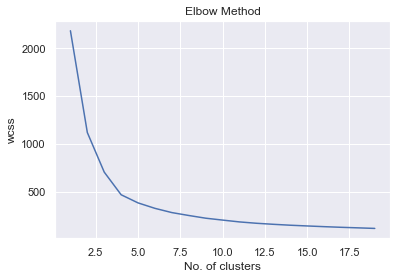

In [25]:
plt.plot(range(1,20),wcss)
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.show()

The point at elbow shape is created is 4.So we will create four clusters.

In [26]:
kmeans = KMeans(n_clusters=4, init='k-means++',max_iter=2000, random_state=0)
y_kmeans = kmeans.fit(norm_data)

In [27]:
labels = y_kmeans.predict(norm_data)

In [29]:
data2 = data[['Income','Relation','TotalAmtSpent']]
data2['Cluster'] = labels
data2 = data2.replace({0:'Need Attention',1:'High Potential',2:'Stars',3:'Leaky Buckets'})

In [30]:
data2.head(5)

,Income,Relation,TotalAmtSpent,Cluster
0,58138.0,110.100000,1617,Stars
1,46344.0,91.766667,27,Need Attention
2,71613.0,98.400000,776,High Potential
3,26646.0,92.633333,53,Need Attention
4,58293.0,93.366667,422,Need Attention


In [31]:
data2['Cluster'].value_counts()

Need Attention    637
Leaky Buckets     575
Stars             532
High Potential    453
Name: Cluster, dtype: int64

In [28]:
dataset.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,HasChild,Children,Age,TotalAmtSpent,Relation
0,Grad,Single,58138.0,58,635,88,546,172,88,88,no child,0,64,1617,110.100000
1,Grad,Single,46344.0,38,11,1,6,2,1,6,child,2,67,27,91.766667
2,Grad,Married,71613.0,26,426,49,127,111,21,42,no child,0,56,776,98.400000
3,Grad,Married,26646.0,26,11,4,20,10,3,5,child,1,37,53,92.633333
4,PGrad,Married,58293.0,94,173,43,118,46,27,15,child,1,40,422,93.366667


In [32]:
dataset = dataset.merge(data2.Cluster,left_index=True,right_index=True)

In [34]:
dataset.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,HasChild,Children,Age,TotalAmtSpent,Relation,Cluster
0,Grad,Single,58138.0,58,635,88,546,172,88,88,no child,0,64,1617,110.100000,Stars
1,Grad,Single,46344.0,38,11,1,6,2,1,6,child,2,67,27,91.766667,Need Attention
2,Grad,Married,71613.0,26,426,49,127,111,21,42,no child,0,56,776,98.400000,High Potential
3,Grad,Married,26646.0,26,11,4,20,10,3,5,child,1,37,53,92.633333,Need Attention
4,PGrad,Married,58293.0,94,173,43,118,46,27,15,child,1,40,422,93.366667,Need Attention


In [35]:
pd.options.display.float_format = "{:.0f}".format
summary=dataset[['Income','Relation','TotalAmtSpent','Cluster']]
summary.set_index("Cluster", inplace = True)
summary=summary.groupby('Cluster').describe().transpose()
summary.head()

Cluster       High Potential  Leaky Buckets  Need Attention  Stars
Income count             453            575             637    532
       mean            72359          34720           37959  69292
       std              9807          11810           12060  11329
       min             50334           2447            4428  44802
       25%             65210          26490           29315  60708

In [36]:
# Stars: Old customers with high income and high spending nature.
# test1=[100000,108,2400]
# Need Attention: New customers with below-average income and low spending nature. 
# test2=[40000,90,58]
# High Potential: New customers with high income and high spending nature.
# test3=[95000,92,2300]
# Leaky Bucket: Old customers with below-average income and a low spending nature.
# test4=[10000,110,90]
import random

Income_list=[]
Relation_list=[]
TotalAmtSpent_list=[]
for i in range(1,16):
    income = random.randint(8000,110000)
    relation = random.randint(88,111)
    total = random.randint(30,2500)
    Income_list.append(income)
    Relation_list.append(relation)
    TotalAmtSpent_list.append(total)

test_data = {'Income':Income_list,'Relation':Relation_list,'TotalAmtSpent':TotalAmtSpent_list}
df= pd.DataFrame(data=test_data)


In [37]:
df.head(15)

,Income,Relation,TotalAmtSpent
0,42989,100,1600
1,94188,104,303
2,85537,100,1183
3,106203,88,1677
4,94611,111,2346
5,69574,94,971
6,48425,108,142
7,25560,102,329
8,76106,111,378
9,28934,105,2326


for every (Income,Relation,TAS)=cluster i.e.lll = 0, hlh=1, hhh=2,lhl=3, Imean=51000, Rmean=100, Tmean=610

In [38]:
target = [2,1,2,2,0,1,3,0,2,2,1,2,0,3,2]
scaled_test_data = sc.fit_transform(df)

In [39]:
norm_test_data = normalize(scaled_test_data, norm='l2')

In [40]:
test_kmeans=y_kmeans.predict(norm_test_data)
test_kmeans

array([3, 1, 1, 3, 2, 0, 1, 0, 1, 3, 1, 0, 3, 3, 3])